   # Effects of Covid-19

In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

## Effects of Covid-19 on Mortality in The United States

In [2]:
df = pd.read_csv("CSVfiles/WPP2022_Demographic_Indicators_Medium.csv")
df = df[(df['Location'] == 'United States of America') & (df['Time'].isin([2018,2019,2020, 2021]))][['Location', 'Time', 'Deaths']]
df

C:\Users\carso\AppData\Local\Temp\ipykernel_9540\2645720572.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CSVfiles/WPP2022_Demographic_Indicators_Medium.csv")


,Location,Time,Deaths
39132,United States of America,2018,2780.175
39133,United States of America,2019,2778.148
39134,United States of America,2020,3238.518
39135,United States of America,2021,3280.682


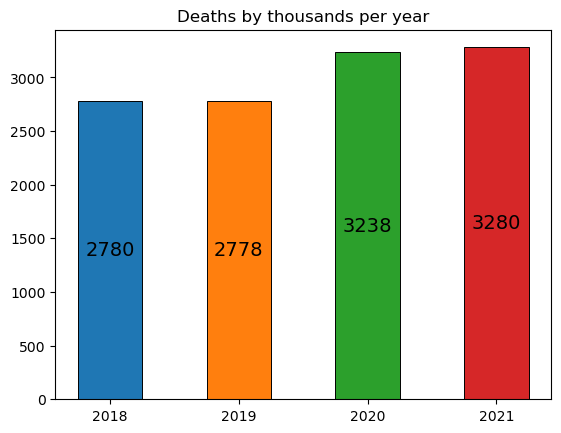

In [3]:
# Initialize a subplot with one axis
fig, ax = plt.subplots()

# Group the dataframe by the 'Time' column
df_grouped = df.groupby('Time')

# Loop through the grouped dataframe
for time, group in df_grouped:
    # Plot a bar chart for each group, with 'Time' on the x-axis and 'Deaths' on the y-axis
    c = ax.bar(group['Time'], group['Deaths'], width=0.5, edgecolor='black', linewidth=0.7, label=str(time))
    # Create a label for each bar, with the value of 'Deaths'
    labels = [str(int(val)) for val in group['Deaths']]
    # Add the labels to the bars, with 'center' alignment and font size 14
    ax.bar_label(c, label_type='center', labels=labels, size=14)

# Set the x-axis tick labels to the unique values of the 'Time' column
plt.xticks(df['Time'])
# Set the title of the plot
plt.title("Deaths by thousands per year")
# Display the plot
plt.show()

### Ten Most Populated Countries Peak Day of Covid-19 Cases

In [4]:
# Read the CSV file into a data frame
df2 = pd.read_csv("CSVfiles/WHO-COVID-19-global-data.csv")

# Filter the data frame to only include the countries of interest
countries = ['China', 'India', 'United States of America', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Mexico']
df2 = df2[df2['Country'].isin(countries)]

# Sort the data frame based on 'Country' and 'New_cases' in ascending and descending order respectively
df2 = df2.sort_values(by=['Country', 'New_cases'], ascending=[True, False])

# Drop duplicate entries for each country and keep only the first (highest) entry
df2 = df2.drop_duplicates(subset='Country', keep='first')

# Select only the 'Country', 'New_cases', and 'Date_reported' columns
df2 = df2[['Country', 'New_cases', 'Date_reported']]

# Rename the columns
df2.columns = ['Country', 'Highest New Cases', 'Date_reported']

# Set the index of the data frame to be the 'Country' column
df2.set_index('Country', inplace=True)

# Show the resulting data frame
df2['Date_reported'] = pd.to_datetime(df2['Date_reported'], format='%Y-%m-%d')
df2.sort_values(by='Date_reported', inplace=True)
df2

,Highest New Cases,Date_reported
Country,,
India,414188,2021-05-07
Bangladesh,16230,2021-07-28
Nigeria,4035,2021-12-23
United States of America,1265520,2022-01-12
Mexico,81266,2022-01-19
Pakistan,8183,2022-01-29
Brazil,298408,2022-02-05
Russian Federation,203949,2022-02-11
Indonesia,64718,2022-02-16


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

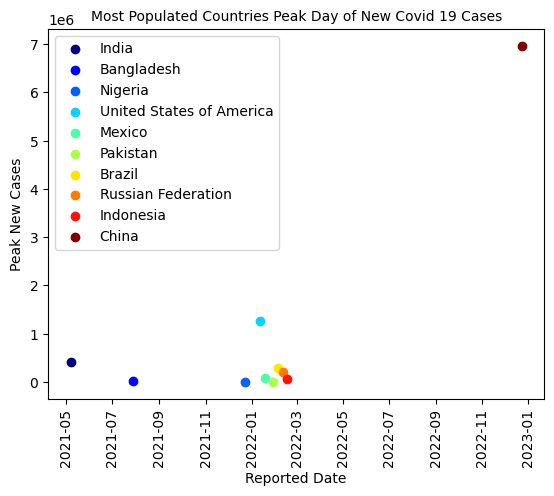

,Highest New Cases,Date_reported
Country,,
India,414188,2021-05-07
Bangladesh,16230,2021-07-28
Nigeria,4035,2021-12-23
United States of America,1265520,2022-01-12
Mexico,81266,2022-01-19
Pakistan,8183,2022-01-29
Brazil,298408,2022-02-05
Russian Federation,203949,2022-02-11
Indonesia,64718,2022-02-16


In [5]:
# Create a list of scatter plots with different colors for each country
scatters = []
for i, country in enumerate(df2.index):
    scatters.append(plt.scatter(df2.loc[country, 'Date_reported'], df2.loc[country, 'Highest New Cases'], c=plt.cm.jet(np.linspace(0,1,len(df2)))[i], label=country))

# Add labels for the x-axis and y-axis
plt.xticks(rotation=90) 
plt.xlabel('Reported Date')
plt.ylabel('Peak New Cases')
plt.title('Most Populated Countries Peak Day of New Covid 19 Cases', fontsize=10)
# Create the legend
plt.legend(handles=scatters)
# Show the plot
plt.show()
df2

## Effects of Covid-19 on Mental Health in the United States

In [6]:
# Import our data into pandas from CSV
string_thing = 'Resources/Indicators_of_Anxiety_or_Depression.csv'
MentalHealth_df = pd.read_csv(string_thing, low_memory=False)

MentalHealth_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",4/23/2020,5/5/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [7]:
# New dataframe to only keep the columns needed and drop null values in the data
MH_ByAge_df = MentalHealth_df[["Indicator", "Group", "Subgroup", "State", "Time Period Start Date", "Value","Low CI","High CI"]].dropna()

MH_ByAge_df

,Indicator,Group,Subgroup,State,Time Period Start Date,Value,Low CI,High CI
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,4/23/2020,23.5,22.7,24.3
1,Symptoms of Depressive Disorder,By Age,18 - 29 years,United States,4/23/2020,32.7,30.2,35.2
2,Symptoms of Depressive Disorder,By Age,30 - 39 years,United States,4/23/2020,25.7,24.1,27.3
3,Symptoms of Depressive Disorder,By Age,40 - 49 years,United States,4/23/2020,24.8,23.3,26.2
4,Symptoms of Depressive Disorder,By Age,50 - 59 years,United States,4/23/2020,23.2,21.5,25.0
...,...,...,...,...,...,...,...,...
12262,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,1/4/2023,28.6,24.9,32.6
12263,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,1/4/2023,31.3,28.7,34.1
12264,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,1/4/2023,37.9,32.7,43.4
12265,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,1/4/2023,28.1,24.3,32.1


In [8]:
# Filtering data to only keep 'Symptoms of Anxiety Disorder or Depressive Disorder' in the 'Indicator' column & 
# 'By Age' in the 'Group' column
anxiety_and_depression_df = MH_ByAge_df.loc[(MH_ByAge_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder') & (MH_ByAge_df['Group'] == 'By Age')]

# Grouping by "Time Period Start Date" so it only shows on date per age subgroup
anxiety_and_depression_df.groupby("Time Period Start Date").mean()

print(anxiety_and_depression_df)

                                               Indicator   Group  \
141    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
142    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
143    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
144    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
145    Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
...                                                  ...     ...   
12192  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12193  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12194  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12195  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   
12196  Symptoms of Anxiety Disorder or Depressive Dis...  By Age   

                 Subgroup          State Time Period Start Date  Value  \
141         18 - 29 years  United States              4/23/2020   46.8   
142         30 - 39 years  United S

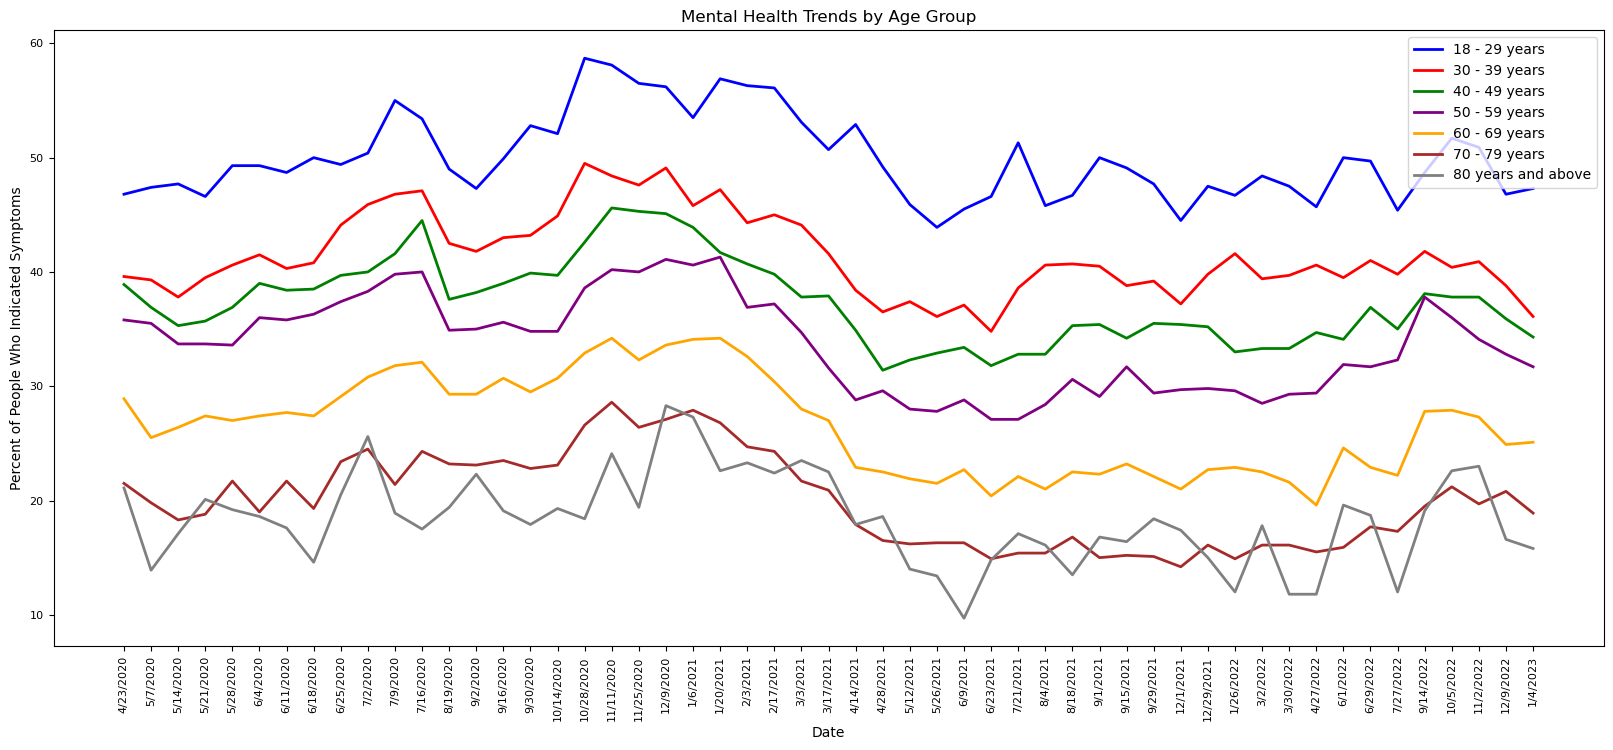

In [9]:
# Create a separate dataframe for each age subgroup
group1 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='18 - 29 years']
group2 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='30 - 39 years']
group3 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='40 - 49 years']
group4 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='50 - 59 years']
group5 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='60 - 69 years']
group6 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='70 - 79 years']
group7 = anxiety_and_depression_df.loc[anxiety_and_depression_df['Subgroup']=='80 years and above']

# Resize graph to fit data
plt.figure(figsize=(20, 8))

# Graph each data point
group1, = plt.plot(group1['Time Period Start Date'], group1['Value'], color="blue", label="18 - 29 years", linewidth=2, linestyle='-')
group2, = plt.plot(group2['Time Period Start Date'], group2['Value'], color="red", label="30 - 39 years", linewidth=2, linestyle='-')
group3, = plt.plot(group3['Time Period Start Date'], group3['Value'], color="green", label="40 - 49 years", linewidth=2, linestyle='-')
group4, = plt.plot(group4['Time Period Start Date'], group4['Value'], color="purple", label="50 - 59 years", linewidth=2, linestyle='-')
group5, = plt.plot(group5['Time Period Start Date'], group5['Value'], color="orange", label="60 - 69 years", linewidth=2, linestyle='-')
group6, = plt.plot(group6['Time Period Start Date'], group6['Value'], color="brown", label="70 - 79 years", linewidth=2, linestyle='-')
group7, = plt.plot(group7['Time Period Start Date'], group7['Value'], color="gray", label="80 years and above", linewidth=2, linestyle='-')

# Add title and labels to the plot
plt.title("Mental Health Trends by Age Group")
plt.xlabel("Date")
plt.ylabel("Percent of People Who Indicated Symptoms")

# Add a legend to the plot
plt.legend(loc="upper right")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set font size for x-axis labels
plt.tick_params(axis='both', labelsize=8)

# Add grid
# plt.grid(True)

plt.show()

In [19]:
# Filtering data to only keep 'Symptoms of Anxiety Disorder or Depressive Disorder' in the 'Indicator' column & 
# 'By Sex' in the 'Group' column
MH_BySex_df = MH_ByAge_df.loc[(MH_ByAge_df['Indicator'] == 'Symptoms of Anxiety Disorder or Depressive Disorder') & (MH_ByAge_df['Group'] == 'By Sex')]


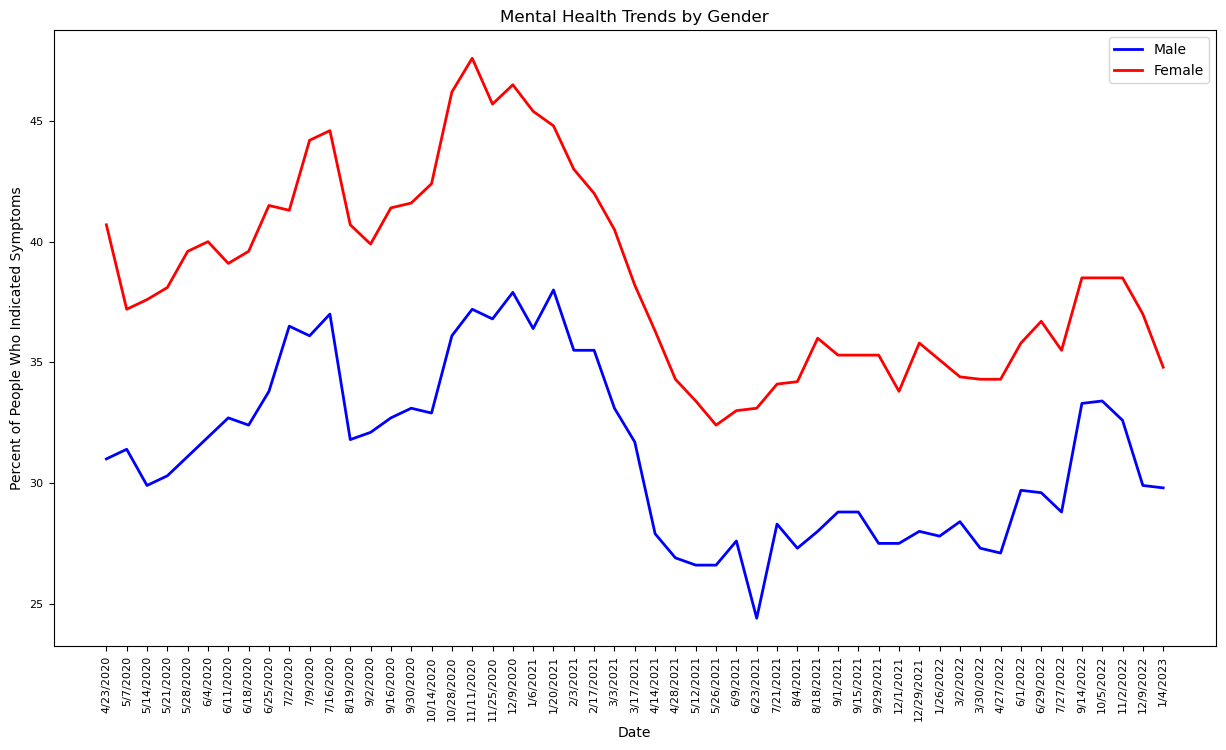

In [20]:
# MH_BySex_df['Time Period Start Date'] = pd.to_datetime(MH_BySex_df['Time Period Start Date'], format='%m/%d/%Y')

# Define the x and y values from the DataFrame
male = MH_BySex_df.loc[MH_BySex_df['Subgroup']=='Male']
female = MH_BySex_df.loc[MH_BySex_df['Subgroup']=='Female']

# Resize graph to fit data
plt.figure(figsize=(15, 8))

# Graph each data point
male, = plt.plot(male['Time Period Start Date'], male['Value'], color="blue", label="Male", linewidth=2, linestyle='-')
female, = plt.plot(female['Time Period Start Date'], female['Value'], color="red", label="Female", linewidth=2, linestyle='-')

# Add title and labels to the plot
plt.title("Mental Health Trends by Gender")
plt.xlabel("Date")
plt.ylabel("Percent of People Who Indicated Symptoms")

# Add a legend to the plot
plt.legend(loc="upper right")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set font size for x-axis labels
plt.tick_params(axis='both', labelsize=8)

# Show the plot
plt.show()

## Enrollment in Education before and during the pandemic 

In [12]:
edu_ps_df = pd.read_csv("CSVfiles/postsecondary_data.csv", encoding="utf-8", index_col="Year")
edu_k12_df = pd.read_csv("CSVfiles/k_12_data.csv", encoding="utf-8", index_col="Year")

In [13]:
edu_k5_df = edu_k12_df[['Enrolled in K', 'Enrolled in 1st', 'Enrolled in 2nd', 'Enrolled in 3rd', 'Enrolled in 4th', 'Enrolled in 5th']]
edu_6to8_df = edu_k12_df[['Enrolled in 6th', 'Enrolled in 7th', 'Enrolled in 8th']]
edu_9to12_df = edu_k12_df[['Enrolled in 9th', 'Enrolled in 10th', 'Enrolled in 11th', 'Enrolled in 12th']]

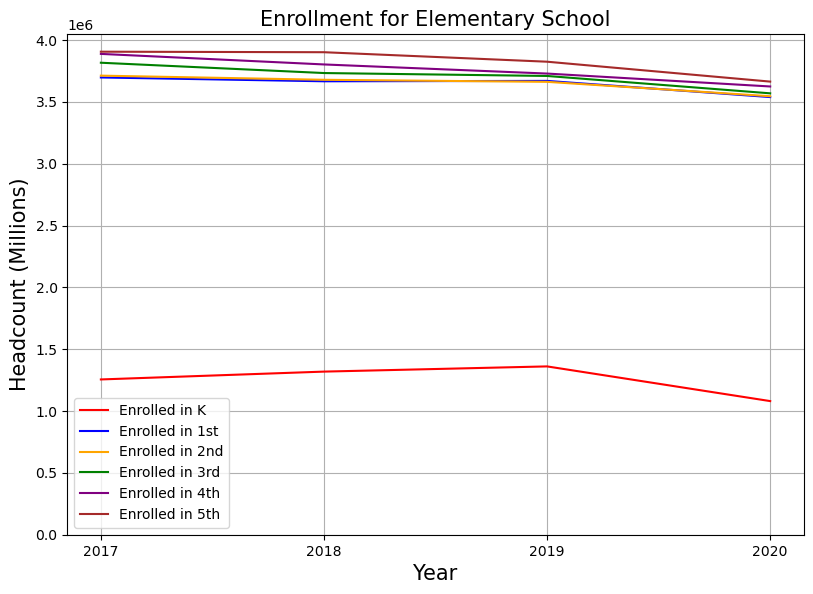

,Enrolled in K,Enrolled in 1st,Enrolled in 2nd,Enrolled in 3rd,Enrolled in 4th,Enrolled in 5th
Year,,,,,,
2018,4.804997,-0.842447,-0.910172,-2.233647,-2.244604,-0.108911
2019,3.090803,0.084155,-0.454506,-0.634547,-1.976369,-2.006270
2020,-25.955093,-3.695347,-3.280756,-3.937178,-2.880652,-4.391126


In [14]:
# Build line plot for elem school
fig, ax = plt.subplots()
edu_k5_df.plot(kind='line', ax=ax, color=['r', 'b', 'orange', 'g', 'purple', 'brown'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for Elementary School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount (Millions)', fontsize=15)
plt.xticks(edu_k12_df.index)
plt.ylim(bottom=0)

# Save the figure
plt.savefig("output_data/elem_headcounts.png")

# Show plot
plt.show()

# Percent change year over year
difference = edu_k5_df.diff()
change = (difference/edu_k5_df*100).dropna()
change

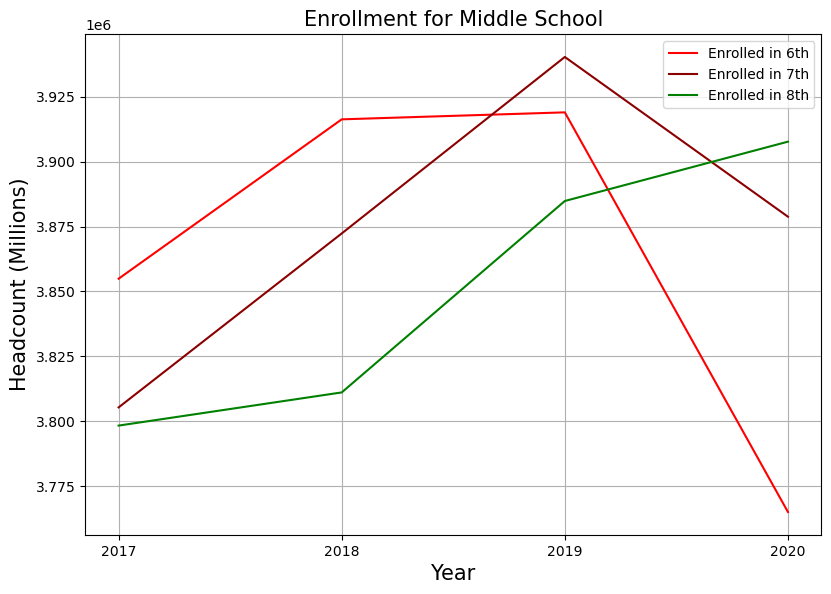

,Enrolled in 6th,Enrolled in 7th,Enrolled in 8th
Year,,,
2018,1.567545,1.730289,0.335229
2019,0.068589,1.725283,1.898112
2020,-4.088504,-1.586207,0.584894


In [15]:
# Build line plot for middle school
fig, ax = plt.subplots()
edu_6to8_df.plot(kind='line', ax=ax, color=['r', 'darkred', 'g'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for Middle School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount (Millions)', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/ms_headcounts.png")

# Show plot
plt.show()

# Percent change year over year
difference = edu_6to8_df.diff()
change = (difference/edu_6to8_df*100).dropna()
change

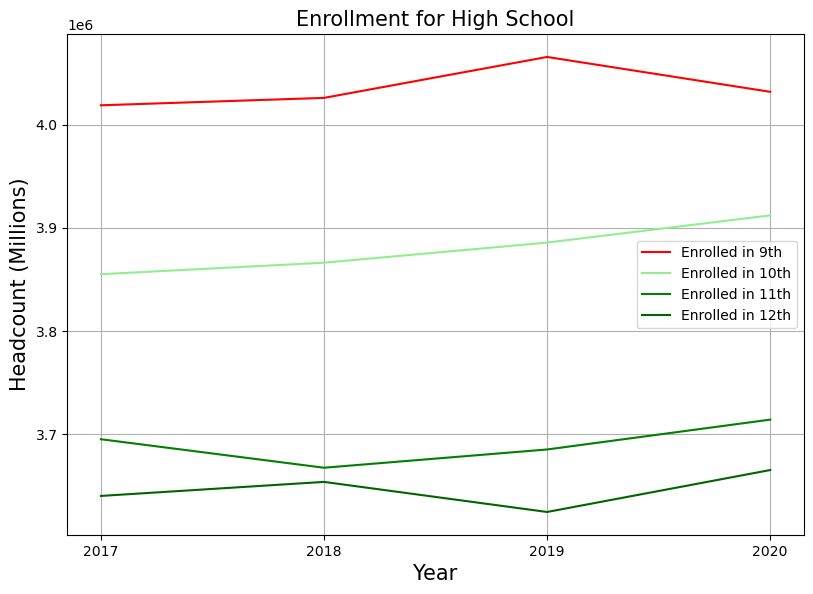

,Enrolled in 9th,Enrolled in 10th,Enrolled in 11th,Enrolled in 12th
Year,,,,
2018,0.177875,0.288416,-0.752424,0.371536
2019,0.974744,0.500779,0.479620,-0.803249
2020,-0.836660,0.673400,0.777776,1.107435


In [16]:
# Build line plot for high school
fig, ax = plt.subplots()
edu_9to12_df.plot(kind='line', ax=ax, color=['r', 'lightgreen', 'g', 'darkgreen'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for High School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount (Millions)', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/hs_headcounts.png")

# Show plot
plt.show()

# Percent change year over year
difference = edu_9to12_df.diff()
change = (difference/edu_9to12_df*100).dropna()
change

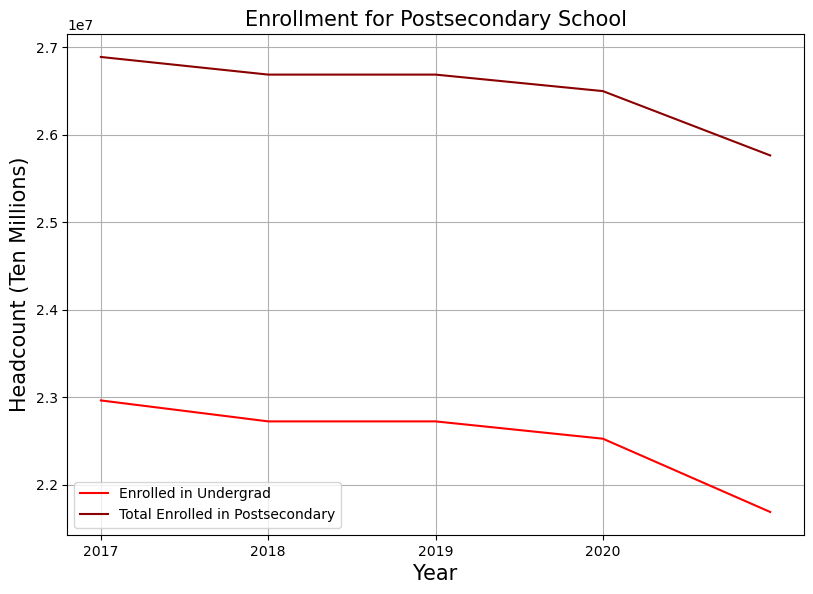

,Enrolled in Undergrad,Total Enrolled in Postsecondary
Year,,
2018,-1.053767,-0.754995
2019,0.000000,0.000000
2020,-0.878072,-0.711418
2021,-3.860826,-2.852690


In [17]:
# Build line plot for postsecondary school
fig, ax = plt.subplots()
edu_ps_df[['Enrolled in Undergrad','Total Enrolled in Postsecondary']].plot(kind='line', ax=ax, color=['r', 'darkred'])

# Incorporate the other graph properties
fig.set_size_inches(9.5, 6.5)
ax.grid()
ax.set_title('Enrollment for Postsecondary School', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Headcount (Ten Millions)', fontsize=15)
plt.xticks(edu_k12_df.index)

# Save the figure
plt.savefig("output_data/ps_headcounts.png")

# Show plot
plt.show()

# Percent change year over year
difference = edu_ps_df[['Enrolled in Undergrad','Total Enrolled in Postsecondary']].diff()
change = (difference/edu_ps_df[['Enrolled in Undergrad','Total Enrolled in Postsecondary']]*100).dropna()
change

## Effects of Covid-19 on Unemployment in the United States

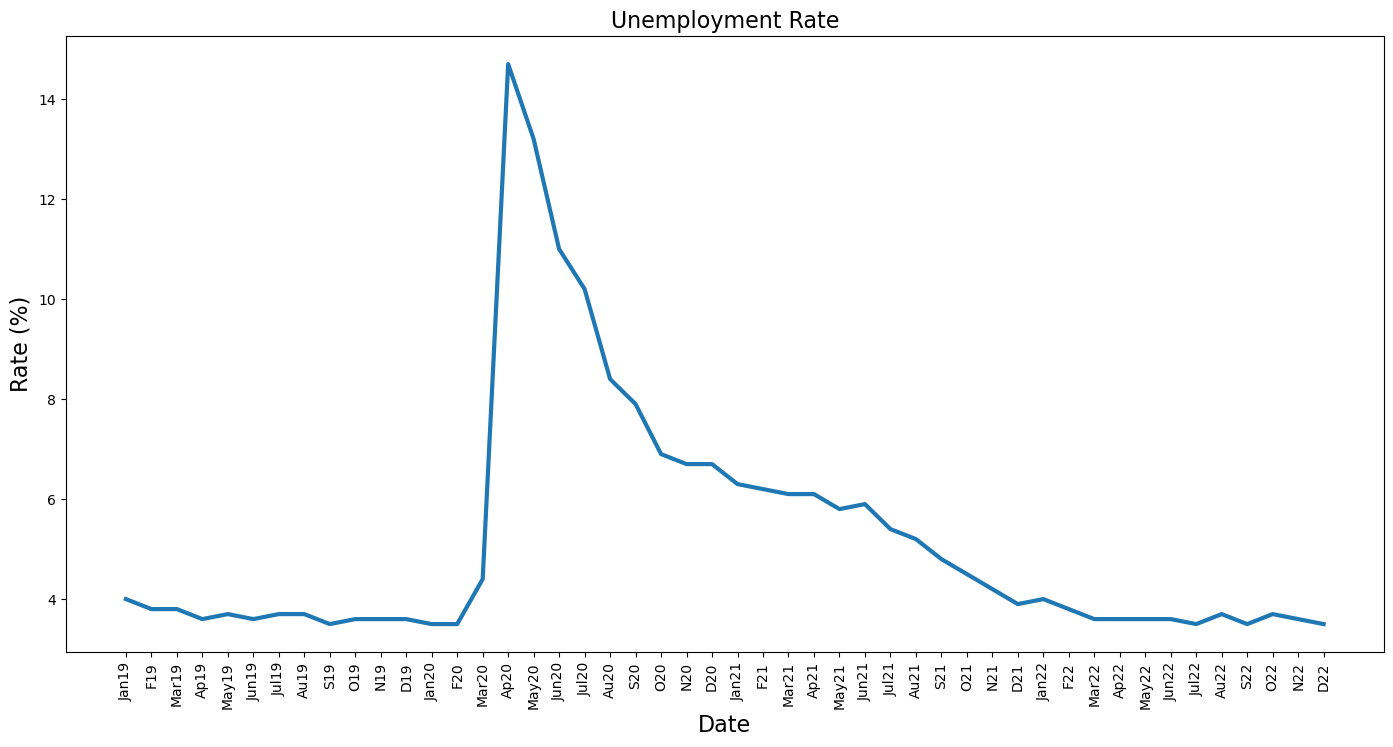

In [18]:
# get data will take the csv data, and cut out the first 11 lines
# so that only the usable data is being parsed

def get_data(filename, firstIndex, secondIndex) -> list:
    data = pd.read_csv(filename, header=None)
    data = data.iloc[firstIndex:secondIndex]
    return data.values.tolist()

#parse data will take the raw data and format it into a way where we can plot it
def parse_data(data, firstIndex, secondIndex):
    data = get_data(data, firstIndex, secondIndex)
    monthsAndYears = []
    values = []
    months = ["Jan", "F", "Mar", "Ap", "May", "Jun", "Jul", "Au", "S", "O", "N", "D"]
    for i in range(len(data)):
        dataInYear = data[i]
        year = dataInYear.pop(0)
        for j in range(len(dataInYear)):
            monthAndYear = f'{months[j]}{year[2]}{year[3]}'
            unemploymentRate = dataInYear[j]
            monthsAndYears.append(monthAndYear)
            values.append(unemploymentRate)
    for i in range(len(values)):
        values[i] = float(values[i])
    return [monthsAndYears, values]
        

#firstIndex is exclusive, secondIndex is inclusive
unemploymentData = parse_data('CSVfiles/unemployment.csv', 18, 22)
plt.subplots(figsize=(17, 8))
plt.plot(unemploymentData[0], unemploymentData[1],linewidth=3 )
plt.xticks(rotation=90)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Rate (%)',fontsize=16)
plt.title('Unemployment Rate', fontsize=16)
plt.show()